<a href="https://colab.research.google.com/github/SahanUday/Eleczone_CNN/blob/main/Ass02_part02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 743.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.7 MB/s eta 0:00:00


In [8]:
# Install required packages if needed (torchvision is usually pre-installed with PyTorch)
# !pip install torch torchvision matplotlib

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np



In [9]:
# Define the transform pipeline for upsampling, channel replication, and normalization
# Upsamples to 224x224 (for MobileNetV2/EfficientNetB0), converts to tensor, replicates grayscale to pseudo-RGB,
# and applies ImageNet normalization for pre-trained models
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Upsample to 224x224 (bilinear interpolation by default)
    transforms.Grayscale(num_output_channels=3),  # Channel replication: [1, H, W] -> [3, H, W] (pseudo-RGB)
    transforms.ToTensor(),  # Convert PIL to [0,1] float tensor (shape: [3, 224, 224])
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Load the MNIST dataset using torchvision
# train=True for training split, download=True to fetch if not present
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Batch the datasets for efficiency
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.2MB/s]


In [10]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=3)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

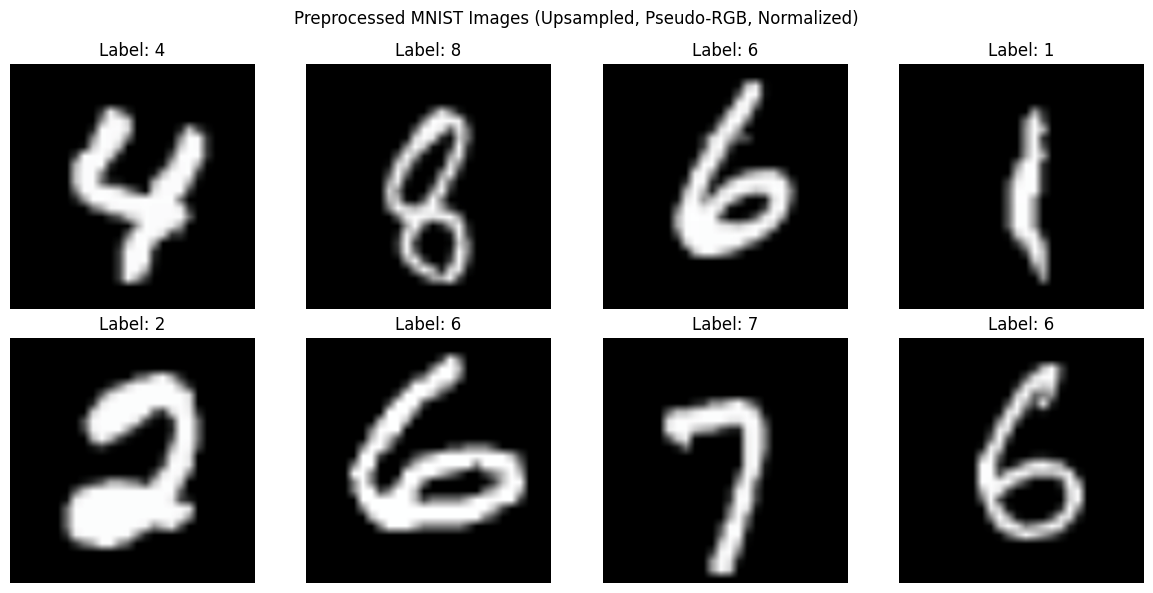

Number of training examples: 60000
Number of test examples: 10000
Image shape after preprocessing: torch.Size([3, 224, 224])


In [17]:
# Example: Visualize a few preprocessed images (denormalize for display)
def denormalize_for_display(image):
    # Reverse normalization for visualization
    # image shape: (3, 224, 224)
    mean = np.array([0.485, 0.456, 0.406]).reshape(3, 1, 1)
    std = np.array([0.229, 0.224, 0.225]).reshape(3, 1, 1)
    image = image.numpy()  # To numpy
    image = (image * std + mean) * 255.0
    image = np.clip(image, 0, 255).astype('uint8')
    return image.transpose(1, 2, 0)  # CHW to HWC for imshow

plt.figure(figsize=(12, 6))
data_iter = iter(train_loader)
image_batch, label_batch = next(data_iter)

for j in range(min(8, len(image_batch))):  # Show up to 8 images
    plt.subplot(2, 4, j+1)
    img_display = denormalize_for_display(image_batch[j])
    plt.imshow(img_display)
    plt.title(f'Label: {label_batch[j].item()}')
    plt.axis('off')
plt.suptitle('Preprocessed MNIST Images (Upsampled, Pseudo-RGB, Normalized)')
plt.tight_layout()
plt.show()

# Print dataset info
print(f"Number of training examples: {len(train_dataset)}")
print(f"Number of test examples: {len(test_dataset)}")
print(f"Image shape after preprocessing: {image_batch.shape[1:]}")  # torch.Size([224, 224, 3])